In [1]:
import math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
! ls *.txt

LE_r_eps=1e-3_points.txt    LE_r_selA=1e-3_points.txt
LE_r_negeps=1e-3_points.txt LE_r_selAB=1e-3_points.txt


In [3]:
with open('LE_r_selAB=1e-3_points.txt') as f:
    selAB = [list(map(float, x.split())) for x in f.readlines()] # f*, x (lambda), y (rho)

In [4]:
N = 1e5

0.2
0.6
2.0
6.0
20.0


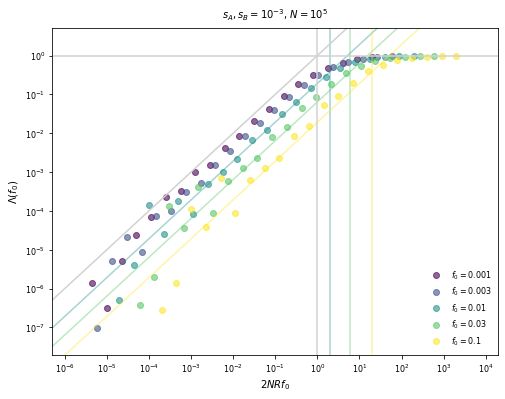

In [7]:
plt.figure(figsize=(8,6))

scalar_map = matplotlib.cm.ScalarMappable(norm=matplotlib.colors.Normalize(vmin=-3, vmax=-1), 
                                          cmap=plt.get_cmap('viridis'))

fs = sorted(list(set([x[0] for x in selAB])))

for f in fs:
    
    gamma = 2*N*0.001*f
    print(gamma)

    plt.loglog([x[1] for x in selAB if x[0] == f], [x[2] for x in selAB if x[0] == f], 'o', 
               color=scalar_map.to_rgba(math.log10(f)), alpha=0.6, 
               label='$f_0=$' + str(f))
    
    if gamma > 1:
        plt.loglog(np.logspace(-6.5,5,25), [x / gamma * 23/60 for x in np.logspace(-6.5,5,25)], color=scalar_map.to_rgba(math.log10(f)), alpha=0.4)
        plt.axvline(gamma, 0, 1, color=scalar_map.to_rgba(math.log10(f)), alpha=0.4)

plt.loglog(np.logspace(-6.5,5,25), np.ones_like(np.logspace(-6.5,5,25)), color="#d1d1d1")
plt.loglog(np.logspace(-6.5,5,25), np.logspace(-6.5,5,25), color="#d1d1d1")
plt.axvline(1, 0, 1, color="#d1d1d1")
    
plt.xticks([1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4], 
           ['$10^{-6}$', '$10^{-5}$', '$10^{-4}$', '$10^{-3}$', '$10^{-2}$', '$10^{-1}$', '$10^{0}$', '$10^{1}$', '$10^{2}$', '$10^{3}$', '$10^{4}$'])
plt.yticks([1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0], 
           ['$10^{-7}$', '$10^{-6}$', '$10^{-5}$', '$10^{-4}$', '$10^{-3}$', '$10^{-2}$', '$10^{-1}$', '$10^{0}$'])

plt.ylim([2e-8,5])
plt.xlim([0.5e-6,2e4])

plt.minorticks_off()
plt.tick_params(axis='both', labelsize=8)

plt.ylabel("$\\Lambda(f_0)$", fontsize=10)
plt.xlabel("$2 N R f_0$", fontsize=10)    
plt.title("$s_A, s_B = 10^{-3}$" + ", " + "$N = 10^5$", fontsize=10, pad=10)

plt.legend(frameon=False,fontsize=8,loc='lower right');

plt.savefig('LE_r_selAB=1e-3_N=1e5_theory.png',dpi=600,bbox_inches='tight') 


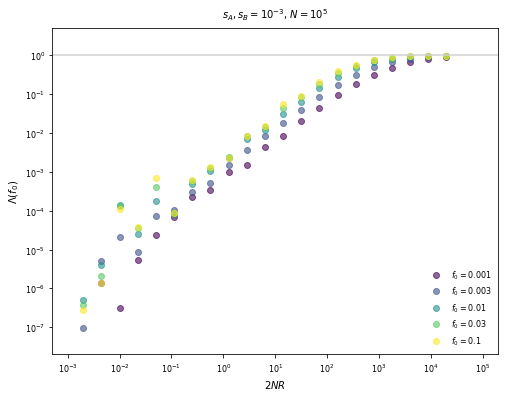

In [10]:
plt.figure(figsize=(8,6))

scalar_map = matplotlib.cm.ScalarMappable(norm=matplotlib.colors.Normalize(vmin=-3, vmax=-1), 
                                          cmap=plt.get_cmap('viridis'))

fs = sorted(list(set([x[0] for x in selAB])))

for f in fs:
    
    gamma = 2*N*0.001*f

    plt.loglog([x[1] / x[0] for x in selAB if x[0] == f], [x[2] for x in selAB if x[0] == f], 'o', 
               color=scalar_map.to_rgba(math.log10(f)), alpha=0.6, 
               label='$f_0=$' + str(f))

plt.loglog(np.logspace(-4,6,25), np.ones_like(np.logspace(-4,6,25)), color="#d1d1d1")
    
plt.xticks([1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4, 1e5], 
           ['$10^{-3}$', '$10^{-2}$', '$10^{-1}$', '$10^{0}$', '$10^{1}$', '$10^{2}$', '$10^{3}$', '$10^{4}$', '$10^{5}$'])
plt.yticks([1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0], 
           ['$10^{-7}$', '$10^{-6}$', '$10^{-5}$', '$10^{-4}$', '$10^{-3}$', '$10^{-2}$', '$10^{-1}$', '$10^{0}$'])

plt.ylim([2e-8,5])
plt.xlim([5e-4,2e5])

plt.minorticks_off()
plt.tick_params(axis='both', labelsize=8)

plt.ylabel("$\\Lambda(f_0)$", fontsize=10)
plt.xlabel("$2 N R$", fontsize=10)    
plt.title("$s_A, s_B = 10^{-3}$" + ", " + "$N = 10^5$", fontsize=10, pad=10)

plt.legend(frameon=False,fontsize=8,loc='lower right');

plt.savefig('LE_r_f0_selAB=1e-3_N=1e5_theory.png',dpi=600,bbox_inches='tight') 
